# Prepare the Data for Machine Learning Algorithms

El siguiente notebook tiene por objetivo desarollar el concepto de *pipeline* o canalización. El núcleo de una canalización consiste en dividir una tarea de aprendizaje automático completa en un flujo de trabajo de varios pasos. Cada paso es un componente que se puede desarrollar, optimizar, configurar y automatizar individualmente.
$$$$
La ventaja de usar funciones para cada nuevo algoritmo son:

* Esto le permitirá reproducir estas transformaciones fácilmente en cualquier conjunto de datos (por ejemplo, la próxima vez que obtenga un conjunto de datos nuevo).

* Gradualmente creará una biblioteca de funciones de transformación que podrá reutilizar en proyectos futuros.

* Puede utilizar estas funciones en su sistema en vivo para transformar los nuevos datos antes de alimentarlos a sus algoritmos.

* Esto le permitirá probar fácilmente varias transformaciones y ver qué combinación de transformaciones funciona mejor.

In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np


housing = pd.read_csv('housing.csv')


housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])
    
strat_train_set, strat_test_set = strat_splits[0]


In [2]:
""" Trabajemos con el conjunto de prueba """

strat_train_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.573125,35.637746,28.577156,2639.402798,538.949094,1425.513929,499.990189,3.870428,206333.518653
std,2.000624,2.133294,12.585738,2185.287466,423.862079,1094.795467,382.865787,1.891936,115314.047529
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.000000,296.000000,787.000000,279.000000,2.562500,119200.000000
50%,-118.510000,34.260000,29.000000,2125.000000,434.000000,1167.000000,408.000000,3.538500,179200.000000
75%,-118.010000,37.720000,37.000000,3154.000000,645.000000,1726.000000,603.000000,4.750000,263925.000000
max,-114.490000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100,500001.000000


In [3]:
strat_train_set.describe(include='object')

,ocean_proximity
count,16512
unique,5
top,<1H OCEAN
freq,7274


In [4]:
""" Descipción de los datos, valores faltantes y dimensión"""
rows, cols = strat_train_set.shape

for column in strat_train_set.columns:
    print(f'{column}: {round(sum(strat_train_set[column].isna())*100/rows,2)}% faltantes')

longitude: 0.0% faltantes
latitude: 0.0% faltantes
housing_median_age: 0.0% faltantes
total_rooms: 0.0% faltantes
total_bedrooms: 1.02% faltantes
population: 0.0% faltantes
households: 0.0% faltantes
median_income: 0.0% faltantes
median_house_value: 0.0% faltantes
ocean_proximity: 0.0% faltantes
income_cat: 0.0% faltantes


## Separación de datos

In [5]:
housing = strat_train_set.drop("median_house_value", axis=1) # Todos los inputs
housing_labels = strat_train_set["median_house_value"].copy() # Salida categorica

housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
13096,-122.42,37.80,52,3321,1115.0,1576,1034,2.0987,NEAR BAY,2
14973,-118.38,34.14,40,1965,354.0,666,357,6.0876,<1H OCEAN,5
3785,-121.98,38.36,33,1083,217.0,562,203,2.4330,INLAND,2
14689,-117.11,33.75,17,4174,851.0,1845,780,2.2618,INLAND,2
20507,-118.15,33.77,36,4366,1211.0,1912,1172,3.5292,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41,2237,597.0,938,523,4.7105,<1H OCEAN,4
13105,-119.31,36.32,23,2945,592.0,1419,532,2.5733,INLAND,2
19301,-117.06,32.59,13,3920,775.0,2814,760,4.0616,NEAR OCEAN,3
19121,-118.40,34.06,37,3781,873.0,1725,838,4.1455,<1H OCEAN,3


## Imputación de valores

Recordemos que para variables numéricas las imputación se debe hacer con 
* moda si es categorica
* mediana si es numérica
* promedio si es numérica sin sesgo

In [6]:
# Identificamos los faltantes del df
housing[housing['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
14452,-120.67,40.50,15,5343,NaN,2503,902,3.5962,INLAND,3
18217,-117.96,34.03,35,2093,NaN,1755,403,3.4115,<1H OCEAN,3
11889,-118.05,34.04,33,1348,NaN,1098,257,4.2917,<1H OCEAN,3
20325,-118.88,34.17,15,4260,NaN,1701,669,5.1033,<1H OCEAN,4
14360,-117.87,33.62,8,1266,NaN,375,183,9.8020,<1H OCEAN,5
...,...,...,...,...,...,...,...,...,...,...
2348,-122.70,38.35,14,2313,NaN,954,397,3.7813,<1H OCEAN,3
366,-122.50,37.75,44,1819,NaN,1137,354,3.4919,NEAR OCEAN,3
18241,-121.44,38.54,39,2855,NaN,1217,562,3.2404,INLAND,3
18493,-116.21,33.75,22,894,NaN,830,202,3.0673,INLAND,3


In [7]:
# Una alternativa es hacer el fill na de pandas

housing_2 = housing.copy()
housing_2['total_bedrooms'].fillna(housing['total_bedrooms'].median(), inplace=True)

In [8]:
housing_2[housing['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
14452,-120.67,40.50,15,5343,434.0,2503,902,3.5962,INLAND,3
18217,-117.96,34.03,35,2093,434.0,1755,403,3.4115,<1H OCEAN,3
11889,-118.05,34.04,33,1348,434.0,1098,257,4.2917,<1H OCEAN,3
20325,-118.88,34.17,15,4260,434.0,1701,669,5.1033,<1H OCEAN,4
14360,-117.87,33.62,8,1266,434.0,375,183,9.8020,<1H OCEAN,5
...,...,...,...,...,...,...,...,...,...,...
2348,-122.70,38.35,14,2313,434.0,954,397,3.7813,<1H OCEAN,3
366,-122.50,37.75,44,1819,434.0,1137,354,3.4919,NEAR OCEAN,3
18241,-121.44,38.54,39,2855,434.0,1217,562,3.2404,INLAND,3
18493,-116.21,33.75,22,894,434.0,830,202,3.0673,INLAND,3


In [9]:
# Vemos que lo imputa con el valor de 434.0, una alternativa más óptima es utilizar

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.select_dtypes(include=[np.number]) # La imputación se limita a numericos
imputer.fit(housing_num) # Se ajusta basado en los valores de las columnas

X = pd.DataFrame(imputer.transform(housing_num), columns=housing_num.columns,
                index=housing_num.index) # Se aplica la transformación a dichos valores

# Se verifica que la imputación se hace igual, arroja el mismo resultado
X[(X['longitude']==-120.67)&(X['latitude']==40.50)]


# """ Alternativas de imputación """
#(strategy="mean")
#(strategy="most_frequent") No limitado a numéricas
#(strategy="constant", fill_value=5) No limitado a numéricas

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.5,15.0,5343.0,434.0,2503.0,902.0,3.5962


## Clases de sklearn

| Objeto   | Descipción  | Ejemplo  |
|-------------|:-------------|-------------|
|Estimadores | Cualquier objeto que pueda estimar algunos parámetros basándose en un conjunto de datos se denomina estimado. La estimación en sí se realiza mediante el método fit. Cualquier otro parámetro necesario para guiar el proceso de estimación se considera un hiperparámetro| SimpleImputer y hip= strategy|
| Transformadores | La transformación se realiza mediante el método transform() con el conjunto de datos a transformar como parámetro. Devuelve el conjunto de datos transformado. Todos los transformadores también tienen un método conveniente llamado fit_transform(), que equivale a llamar a fit() y luego a transform() (pero a veces fit_transform() está optimizado y se ejecuta mucho más rápido | imputer.fit(datos).transform(datos) |
| Predictores | Algunos estimadores, dado un conjunto de datos, son capaces de hacer predicciones; se les llama predictores. | predict() y score()
| Inspección | Se puede acceder a todos los hiperparámetros del estimador directamente a través de variables de instancia públicas y a todos los parámetros aprendidos del estimador se puede acceder a través de variables de instancia públicas con un sufijo de subrayado | imputer.strategy y imputer.statistics_


## Condificación

Sabemos que algunos modelos prefieren trabajar con números por lo que es necesario hacer una codificación acorde a la naturaleza de las variables categoricas. Para hacer OrdinalEnconder hagamos:

In [10]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing[['ocean_proximity']])
housing_cat_encoded = pd.DataFrame(housing_cat_encoded, columns=housing[['ocean_proximity']].columns, 
                                   index=housing[['ocean_proximity']].index)
housing_cat_encoded

,ocean_proximity
13096,3.0
14973,0.0
3785,1.0
14689,1.0
20507,4.0
...,...
14207,0.0
13105,1.0
19301,4.0
19121,0.0


In [11]:
# Dado que ocean proximity no es ordinal, hay que hacer una nueva categoria por cada valor diferente y así no confundir al modelo

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing[['ocean_proximity']])


housing_cat_1hot.toarray()

# La ventaja de OneHotEncoder es que es flexible pues espera exactamente la misma cantidad de cardinalidad

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

# Feature Scaling y Transformaciones

Una de las transformaciones más importantes que debe aplicar a sus datos es el escalado de funciones. Con pocas excepciones, los algoritmos de aprendizaje automático no funcionan bien cuando los atributos numéricos de entrada tienen escalas muy diferentes. Este es el caso de los datos de vivienda: el número total de habitaciones oscila entre 6 y 39.320, mientras que los ingresos medios sólo oscilan entre 0 y 15. Sin ninguna escala, la mayoría de los modelos estarán sesgados hacia ignorar el ingreso medio y centrarse más en el número de habitaciones.

Hay dos formas comunes de conseguir que todos los atributos tengan la misma escala: escalamiento mínimo-máximo y estandarización

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Se crean los clases con hiperparametros
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
std_scaler = StandardScaler()

# Se aplica estimador (fit) y transformador (transform)
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

housing_num_min_max_scaled = pd.DataFrame(housing_num_min_max_scaled, columns=housing_num.columns, index=housing_num.index)
housing_num_min_max_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-0.608519,0.117021,1.000000,-0.831171,-0.641166,-0.807018,-0.614336,-0.779479
14973,0.210953,-0.661702,0.529412,-0.900148,-0.886294,-0.918660,-0.867090,-0.229293
3785,-0.519270,0.236170,0.254902,-0.945012,-0.930424,-0.931419,-0.924585,-0.733369
14689,0.468560,-0.744681,-0.372549,-0.787782,-0.726204,-0.774015,-0.709166,-0.756983
20507,0.257606,-0.740426,0.372549,-0.778015,-0.610243,-0.765796,-0.562815,-0.582171
...,...,...,...,...,...,...,...,...
14207,0.206897,-0.721277,0.568627,-0.886312,-0.808021,-0.885290,-0.805115,-0.419236
13105,0.022312,-0.197872,-0.137255,-0.850298,-0.809631,-0.826279,-0.801755,-0.714018
19301,0.478702,-0.991489,-0.529412,-0.800702,-0.750684,-0.655134,-0.716632,-0.508738
19121,0.206897,-0.678723,0.411765,-0.807773,-0.719117,-0.788738,-0.687512,-0.497166


In [13]:
housing_num_std_scaled = pd.DataFrame(housing_num_std_scaled, columns=housing_num.columns, index=housing_num.index)
housing_num_std_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.359094,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.436356,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.759584,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.736231,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.585590,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.136961,-0.445315,0.060101,0.444041
13105,0.131525,0.319822,-0.443146,0.139847,0.125165,-0.005950,0.083608,-0.685630
19301,1.256209,-1.428701,-1.237721,0.586026,0.556922,1.268299,0.679135,0.101049
19121,0.586397,-0.739605,0.669257,0.522417,0.788136,0.273563,0.882868,0.145396


# Multimodal

Cuando una característica tiene una distribución multimodal (es decir, con dos o más picos claros, llamados modos), como la característica housing_median_age, también puede ser útil agruparla, pero esta vez tratando los ID de los depósitos como categorías, en lugar de números. valores. Esto significa que los índices de los depósitos deben codificarse, por ejemplo, utilizando un OneHotEncoder (por lo que normalmente no querrás utilizar demasiados depósitos). Este enfoque permitirá que el modelo de regresión aprenda más fácilmente diferentes reglas para diferentes rangos de este valor de característica. Por ejemplo, quizás las casas construidas hace unos 35 años tengan un estilo peculiar que pasó de moda y, por lo tanto, sean más baratas de lo que sugeriría su antigüedad.


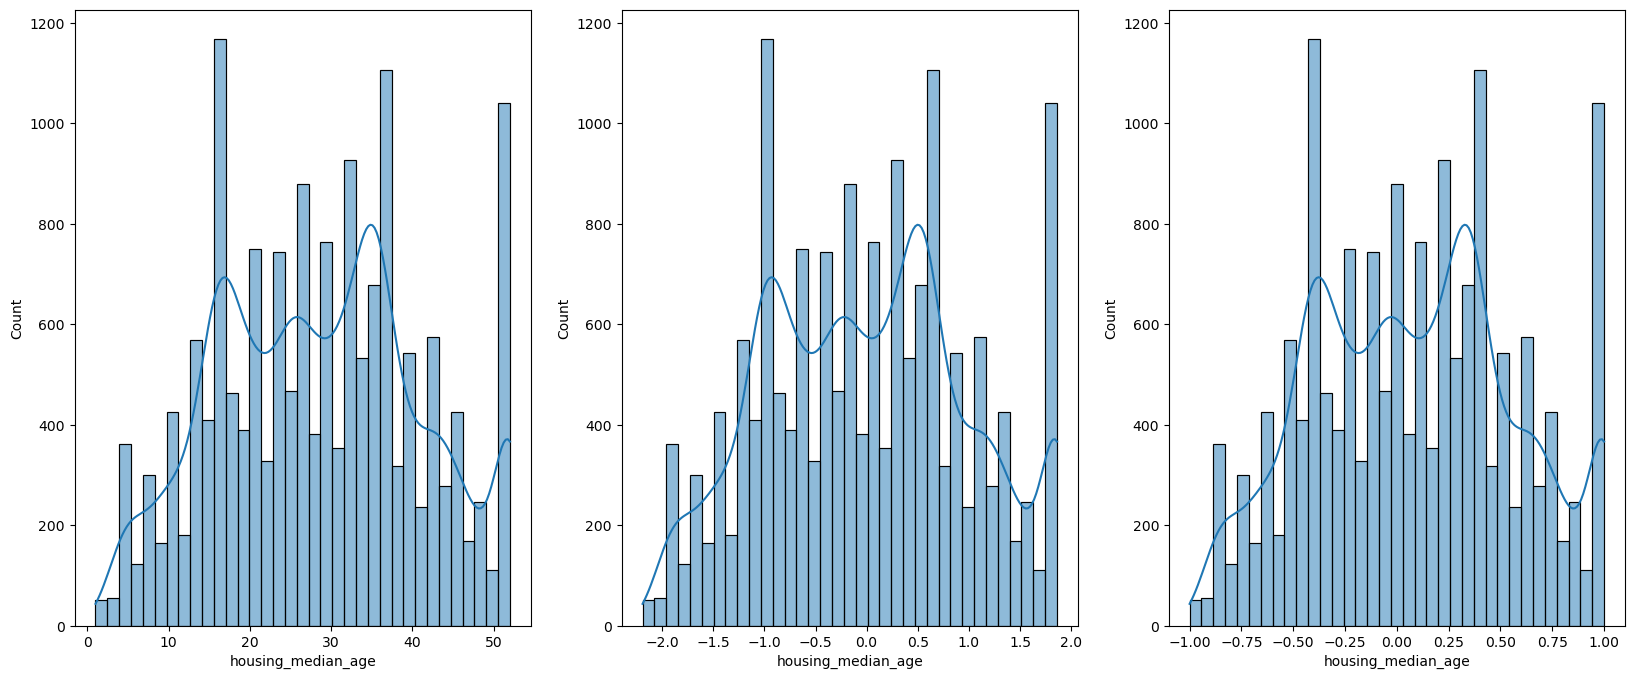

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs= plt.subplots(1,3,figsize=(20,8))
sns.histplot(housing['housing_median_age'],kde=True, ax=axs[0])
sns.histplot(housing_num_std_scaled['housing_median_age'],kde=True, ax=axs[1])
sns.histplot(housing_num_min_max_scaled['housing_median_age'],kde=True, ax=axs[2])

plt.show()

In [15]:
# Visualmente se ve un pico en 16 y otro en 35

# Usar un función de base radial (RBF) puede ser util para crear un nuevo feature dependiendo el valor en X

from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1) # Gamma determina la caida de la exp

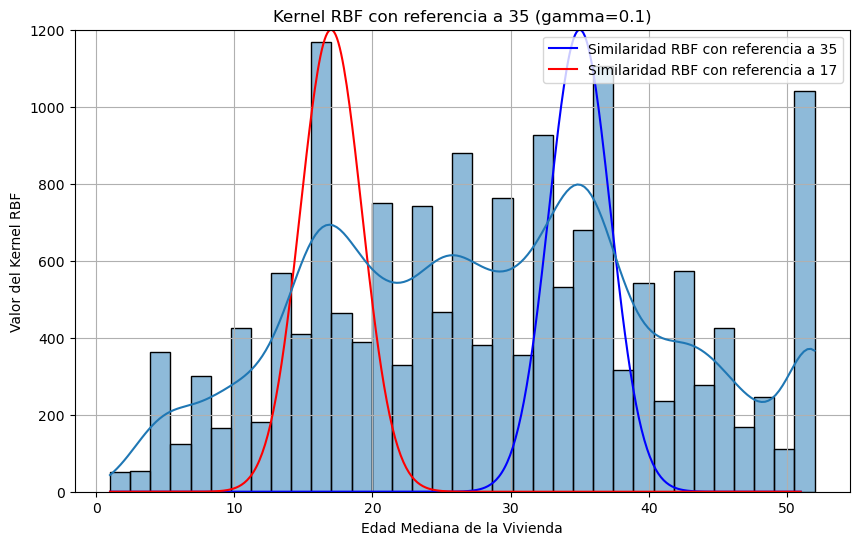

In [16]:
x = np.linspace(1, 51, 500)  # Rango de edades desde 1 hasta 51
gamma = 0.1
center = 35

# Cálculo de la función RBF
rbf_values = np.exp(-gamma * (x - center)**2)
rbf_values_2 = np.exp(-gamma * (x - 17)**2)

plt.figure(figsize=(10, 6))
plt.plot(x, rbf_values*1200, label=f'Similaridad RBF con referencia a {center}', color='blue')
plt.plot(x, rbf_values_2*1200, label=f'Similaridad RBF con referencia a {17}', color='red')

sns.histplot(housing['housing_median_age'], kde=True)
plt.xlabel('Edad Mediana de la Vivienda')
plt.ylim(0, 1200)
plt.ylabel('Valor del Kernel RBF')
plt.title('Kernel RBF con referencia a 35 (gamma=0.1)')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression

""" Cuando se hace algun ajuste en el target """

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame()) # Se escala el target

model = LinearRegression() # Se crea es estimador
model.fit(housing[["median_income"]], scaled_labels) # Se entrena el modelo tomando como predictor median_income
some_new_data = housing[["median_income"]].iloc[:5]  # Se agregar 5 datos mas

scaled_predictions = model.predict(some_new_data) # Se hace la predición el resultado escalado de esas etiquetas 
predictions = target_scaler.inverse_transform(scaled_predictions) # Desescala
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

In [18]:
from sklearn.compose import TransformedTargetRegressor

# Recordemos que solo el outút está escalado
model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler()) #Asume que se hará regresión lineal sobre datos escalados

model.fit(housing[["median_income"]], housing_labels) # Se ajusta el modelo
predictions = model.predict(some_new_data) # Se obtiene la predicción ya desescalada de nuevas X
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

## Transformaciones personalizadas

In [19]:
from sklearn.preprocessing import FunctionTransformer

""" Definición con invers """

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp) #Define la función que quieres aplicar
log_pop = log_transformer.transform(housing[["population"]]) # Se aplica sobre una variable o varias
log_pop

,population
13096,7.362645
14973,6.501290
3785,6.331502
14689,7.520235
20507,7.555905
...,...
14207,6.843750
13105,7.257708
19301,7.942362
19121,7.452982


In [20]:
""" Definiciió con hiperparametros """

rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

In [21]:
""" Para crear tu propio estimador y tranformador que sea ajustable, hay que crear una clase """

from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        print(' se llama a fit')
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        print('se llama a transform')
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

k-means es un algoritmo estocástico, lo que significa que se basa en la aleatoriedad para localizar los grupos, por lo que si desea resultados reproducibles, debe configurar el parámetro random_state


In [22]:
cluster_simil = ClusterSimilarity(n_clusters=20, gamma=1., random_state=42)

similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels)

 se llama a fit
se llama a transform


Este código crea un transformador ClusterSimilarity, estableciendo el número de grupos en 10. Luego llama a fit_transform() con la latitud y longitud de cada distrito en el conjunto de entrenamiento, ponderando cada distrito por su valor medio de la vivienda. El transformador utiliza k-means para localizar los grupos y luego mide la similitud gaussiana del RBF entre cada distrito y los 10 centros de los grupos. El resultado es una matriz con una fila por distrito y una columna por grupo. Veamos las tres primeras filas, redondeando a dos decimales:

In [23]:
similarities[:3].round(2)


array([[0.  , 0.72, 0.  , 0.  , 0.  , 0.  , 0.09, 0.52, 0.  , 0.25, 0.  ,
        0.  , 0.99, 0.33, 0.  , 0.  , 0.  , 0.  , 0.06, 0.  ],
       [0.66, 0.  , 0.33, 0.03, 0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  ,
        0.37, 0.  , 0.  , 0.  , 0.09, 0.  , 0.  , 0.  , 0.92],
       [0.  , 0.39, 0.  , 0.  , 0.05, 0.  , 0.46, 0.54, 0.  , 0.09, 0.  ,
        0.  , 0.67, 0.61, 0.  , 0.  , 0.  , 0.  , 0.13, 0.  ]])

## Transformation Pipelines

Como puede ver, hay muchos pasos de transformación de datos que deben ejecutarse en el orden correcto. Afortunadamente, Scikit-Learn proporciona la clase Pipeline para ayudar con este tipo de secuencias de transformaciones. Aquí hay una pequeña canalización para atributos numéricos, que primero imputará y luego escalará las características de entrada:

In [24]:
from sklearn.pipeline import Pipeline

numerical_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standarsize", StandardScaler()),
])

In [25]:
import sklearn
sklearn.set_config(display="diagram")
numerical_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standarsize', StandardScaler())])

Cuando llama al método fit() de la canalización, llama a fit_transform() secuencialmente en todos los transformadores, pasando la salida de cada llamada como parámetro a la siguiente llamada hasta que llega al estimador final, para lo cual simplemente llama a fit() método.

El pipeline expone los mismos métodos que el estimador final. En este ejemplo, el último estimador es un StandardScaler, que es un transformador, por lo que la tubería también actúa como un transformador. Si llama al método transform() de la canalización, aplicará secuencialmente todas las transformaciones a los datos. Si el último estimador fuera un predictor en lugar de un transformador, entonces la canalización tendría un método predict() en lugar de un método transform(). Llamarlo aplicaría secuencialmente todas las transformaciones a los datos y pasaría el resultado al método predict() del predictor.

In [26]:
housing_num_prepared = numerical_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [27]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=numerical_pipeline.get_feature_names_out(),
    index=housing_num.index)

In [28]:
df_housing_num_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396


In [29]:
numerical_pipeline[0:2]

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standarsize', StandardScaler())])

In [30]:
""" Uso de pipelines por separado """
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]

cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", numerical_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [31]:
final = preprocessing.fit_transform(housing)
final = pd.DataFrame(final, columns=preprocessing.get_feature_names_out(), index=housing.index)

In [32]:
final

,num__longitude,num__latitude,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041,1.0,0.0,0.0,0.0,0.0
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630,0.0,1.0,0.0,0.0,0.0
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049,0.0,0.0,0.0,0.0,1.0
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396,1.0,0.0,0.0,0.0,0.0


Dado que enumerar todos los nombres de las columnas no es muy conveniente, Scikit-Learn proporciona una función make_column_selector() que devuelve una función selectora que puede usar para seleccionar automáticamente todas las características de un tipo determinado, como numéricas o categóricas. Puede pasar esta función de selección a ColumnTransformer en lugar de nombres de columnas o índices. Además, si no le importa nombrar los transformadores, puede usar make_column_transformer(), que elige los nombres por usted, tal como lo hace make_pipeline(). Por ejemplo, el siguiente código crea el mismo ColumnTransformer que antes, excepto que los transformadores se denominan automáticamente "pipeline-1" y "pipeline-2" en lugar de "num" y "cat"

In [33]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (numerical_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [34]:
# Pipeline final

from sklearn.compose import make_column_selector

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [35]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

 se llama a fit
se llama a transform


(16512, 25)

In [36]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age', 'remainder__income_cat'],
      dtype=object)

In [37]:
preprocessing

ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                             SimpleImputer(strategy='median')),
                                            ('standardscaler',
                                             StandardScaler())]),
                  transformers=[('bedrooms',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out=<function ratio_name at 0x12f1af100>,
                                                                      func=<function column_ratio at 0...
                                 ['total_bedrooms', 'total_rooms', 'population',
                                  'households', 'median_income']),
                                ('geo', ClusterSimilarity(random_state=42),
                                 ['latitude', 'longitude']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x13be61dd0>)])